In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("C:/Users/DELL/Downloads/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
df =df.dropna()
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [51]:
df.shape

(4909, 12)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


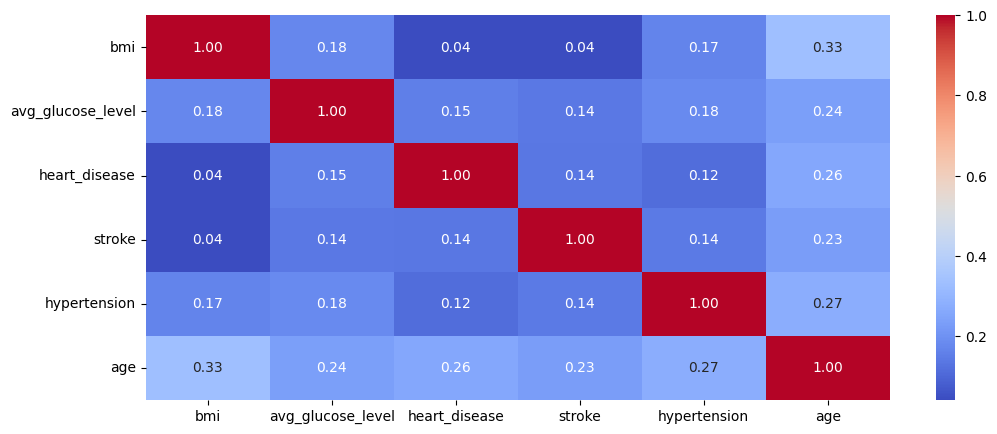

In [54]:
import seaborn as sns
corr_data = df[['bmi', 'avg_glucose_level','heart_disease','stroke','hypertension','age']]
corr = corr_data.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap = 'coolwarm')
plt.show()




In [55]:
#Encoding Categorical Variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,1,True,False,True,False,True,False,False,True,True,False,False


In [56]:
#We want to determine or predict stroke status of patient based on these variables
# First, we scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = df.drop('stroke', axis =1)
scale_feature = scaler.fit_transform(feature)

#Now we train split
from sklearn.model_selection import train_test_split
x = scale_feature
y = df['stroke']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#Building our model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

print('Classification Report:', classification_report(y_test, pred))
print('Confusion matrix', confusion_matrix(y_test, pred))




Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

Confusion matrix [[929   0]
 [ 53   0]]


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",